In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

## ALGORITMO KNN

$d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2}$

In [2]:
def distancia_euclidiana(puntoA, puntoB):#Definimos la funcion con sus parametros.
    """
    Calcula la distancia euclidiana entre dos puntos en un espacio de n dimensiones

    Args:
        -puntoA lista o tupla: Coordenadas del primer punto.
        -puntoB (lista o tupla): Coordenadas del segundo punto.

    Returns:
        Distancia euclidiana entre los puntos.(flotante)
    """
    if len(puntoA) != len(puntoB):#Revisamos que los puntos proporcionados tengan la misma dimension.
        raise ValueError("Los puntos deben tener la misma dimension")

    distancia = 0 #Creamos una variale
    for i in range(len(puntoA)):#Iteramos en los elementos para el puntoA
        distancia += ((puntoA[i] - puntoB[i]) ** 2)#Actualizamos la variable distancia calculando la suma de los cuadrados de la diferencia entre los puntos.

    distancia = distancia ** 0.5#Actualizamos la variable distancia sacando la raiz cuadrada.
    return distancia #Imprimimos el valor de la distancia

In [3]:
#Ejemplo de aplicacion para nuestra funcion distancia_euclidiana
A=[3.3,5.4]
B=[1.4,2.1]
D1=distancia_euclidiana(A, B)
print(D1)

3.8078865529319543


In [4]:
def Algoritmo_KNN(Base_de_datos, Prediccion, Num_puntos):#Definimos nuestra funcion con sus parametros.
    """
    Implementa el algoritmo vecinos mas cercanos (KNN) para clasificar datos en función de una base de datos.

    Args:
    -Base_de_datos (lista): Contiene lo que representaria las muestras de entrenamiento,contiene los datos y la etiqueta de clasificacion para los mismos.
    -Prediccion (lista o tupla): Datos de la predicción a clasificar.
    -Num_puntos (Entero): Número de vecinos más cercanos para hacer la clasificación.

    Returns:
    Clasificacion: La etiqueta para los datos segun la Base_de_datos.
    """
    puntos = []  # Creamos una lista vacia 
    for i in range(len(Base_de_datos)):# Iteramos sobre la Base_de_datos.
        distancia = distancia_euclidiana(Prediccion, Base_de_datos[i][:-1])  # Calculamos la distancia entre los datos de nuestra prediccion y los datos actuales en nuestra base de datos.
        if distancia is not None:  # Verificamos que la distancia no sea del tipo None
            puntos.append((Base_de_datos[i], distancia))  # Actualizamos nuestra lista agregando una tupla que contiene la muestra de la Base_de_datos[i] y su distancia a la lista de prediccion.
    
    puntos.sort(key=lambda x: x[1]) # Ordenamos la lista puntos en función del segundo elemento de cada tupla, es decir, la distancia.

    if len(puntos) > 0:  # Verificamos si hay al menos un punto en la lista
        Etiquetas = [punto[0][-1] for punto in puntos[:Num_puntos]] # Creamos una lista que contiene las etiquetas de clasificación segun el Num_puntos proporcionado.
        Clasificacion = max(set(Etiquetas), key=Etiquetas.count) #Contamos cuál es la etiqueta de clasificacion que se repite más.
    else:
        Etiquetas = [dato[-1] for dato in Base_de_datos]  # Creamos una lista que contiene  las etiquetas de clasificación de toda la base de datos
        Clasificacion = max(set(Etiquetas), key=Etiquetas.count)   #Contamos cuál es la etiqueta de clasificacion que se repite más en la base de datos.

    return Clasificacion  # Imprimimos nuestra clasificacion.

In [5]:
#Ejemplo de aplicacion para nuestra funcion Algoritmo_KNN
Base_de_datos =[
    [1.68,75,'Mexicana'],[1.70,77,'Mexicana'],[1.77,85,'Estadounidense'],[1.80,88,'Estadounidense'],[1.85,86,'Holandes'],
    [1.87,88,'Holandes'],[1.63,68,'Guatemalteca'],[1.66,69,'Guatemalteca']
    ]
Prediccion=[1.70,75]
Num_puntos=3
Nacionalidad=Algoritmo_KNN(Base_de_datos, Prediccion, Num_puntos)
print('Para los datos ingresados la clasificación es:', Nacionalidad)


#Base de datos hecha con base en: https://www.datosmundial.com/estatura-promedio.php

Para los datos ingresados la clasificación es: Mexicana


## REGRESION LOGISTICA
La regresión logística es un modelo estadístico que se utiliza para determinar la probabilidad de que ocurra un evento. Muestra la relación entre características y luego calcula la probabilidad de un resultado determinado.
La regresión logística se utiliza en Machine Learning (ML) para ayudar a crear predicciones precisas. Es similar a la regresión lineal, excepto que en lugar de un resultado gráfico, la variable objetivo es binaria; el valor es 1 o 0.
Existen dos tipos de variables medibles, las variables o características explicativas (elemento que se mide) y la variable de respuesta o variable binaria objetivo, que corresponde al resultado.

Existen tres tipos básicos de regresión logística:

1-Regresión logística binaria: aquí solo existen dos resultados posibles para la respuesta categórica. 

2-Regresión logística multinomial: aquí es donde las variables de respuesta pueden incluir tres o más variables, que no estarán en ningún orden. 

3-Regresión logística ordinal: al igual que la regresión multinomial, puede haber tres o más variables. Sin embargo, existe un orden en el que siguen las medidas. 



https://www.tibco.com/es/reference-center/what-is-logistic-regression


Para proposito de este proyecto, se trabjara con la regresion logistica binaria.

Para esta tenemos que definir una funcion conocido como funcion sigmoide, la cual se encarga de transformar la probabalidad de un evento en terminos binarios (0 y 1), la formula para esta funcion es la siguiente:

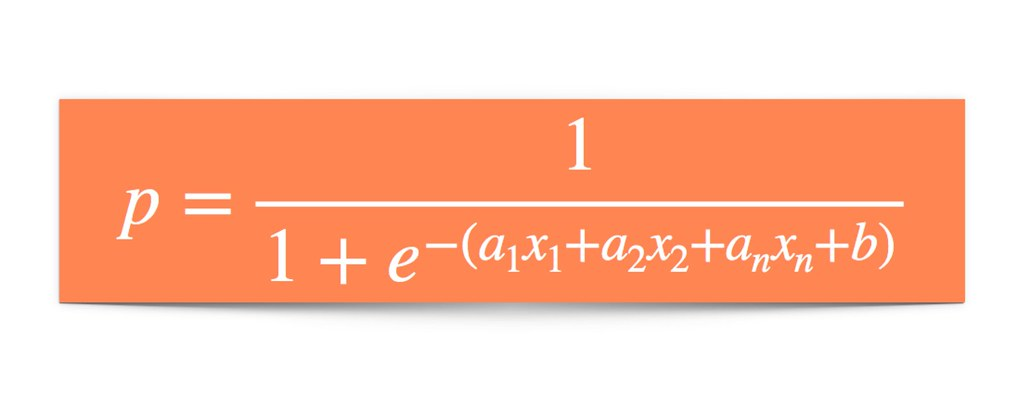


Una formula simplificada de esta funcion es :

$P(Z) = \frac{1}{1 + e^{-z}}$

Donde z representa la combinacion lineal entre los coeficientes de regresion logistica y las variables independientes mas un error genereado por el modelo de entrenamiento que en este caso seria la base de datos.

In [6]:
e=2.71828
def sigmoide(z):
    p= 1/(1+e**(-z))
    return p

In [8]:
def regresion_logistica(coeficientes, variables_independientes, sesgo):
    '''
    Hace una prediccion usando la regresion logistica
    
    Args:
        coeficientes (lista): Coeficientes de la regresión logística.
        variables_independientes (lista): Valores de las variables independientes para la prediccion.
        sesgo (flotante): Erro asociado.

    Returns:
    Clasificacion : "Etiqueta 1" o "Etiqueta 2".
    '''
    if len(coeficientes) != len(variables_independientes):# Calcular la combinación lineal entre coeficientes y las variables independientes
        raise ValueError("No tienen la misma dimension.")

    combinacion_lineal = sesgo#Asumimos que el sesgo ya esta inmerso en la combinacion lineal
    for i in range(len(coeficientes)):
        combinacion_lineal += coeficientes[i] * variables_independientes[i]## Calculamos la combinación lineal


    probabilidad = sigmoide(combinacion_lineal)#Calculamos la probailidad usando la funcion sigmoide

    
    if probabilidad >= 0.5:#Fijamos los umbrales para hacer la clasificacion
        return "Etiqueta 1"
    else:
        return "Etiqueta 2"

In [9]:
# Ejemplo de uso
coeficientes = [-0.5, -2.7, -0.5]
variables_independientes = [60, 1, 120]  # Edad, Sexo (1=mujer), Presión arterial.
sesgo = -0.8
regresion_logistica(coeficientes, variables_independientes, sesgo)

'Etiqueta 2'

## PRUEBA DE LOS ALGORITMOS PARA LA BASE DE DATOS


In [10]:
datos =pd.read_csv('Riesgos_de_Enfermedades_Cardiacas.csv')
datos.head(30)

,Presion arterial,Tabaco en kg,VLDL en mg/dl,Adipositos,Obesidad,Edad,Diagnostico
0,160,12.00,5.73,23.11,25.30,52,0
1,144,0.01,4.41,28.61,28.87,63,1
2,118,0.08,3.48,32.28,29.14,46,0
3,170,7.50,6.41,38.03,31.99,58,1
4,134,13.60,3.50,27.78,25.99,49,1
5,132,6.20,6.47,36.21,30.77,45,1
6,142,4.05,3.38,16.20,20.81,38,1
7,114,4.08,4.59,14.60,23.11,58,1
8,114,0.00,3.83,19.40,24.86,29,1
9,132,0.00,5.80,30.96,30.11,53,1


In [11]:
Objetivo=datos.Diagnostico.value_counts()
print(Objetivo)

0    238
1    224
Name: Diagnostico, dtype: int64


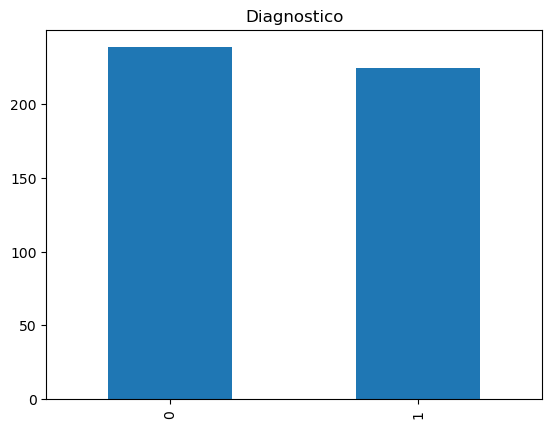

In [12]:
ax=Objetivo.plot.bar()
plt.title("Diagnostico")
plt.show()

Probemos nuestro Algoritmo_KNN para ello creemos nuestra base de datos, consideremos los primeros 30 datos de nuestro archivo csv.

In [13]:
Base_de_datos=[
    [160,12,5.73,23.11,25.3,52,'Sano'],[144,0.01,4.41,28.61,28.87,63,'Enfermo'],[118,0.08,3.48,32.28,29.14,46,'Sano']
    ,[170,7.5,6.41,38.03,31.99,58,'Enfermo'],[134,13.6,3.5,27.78,25.99,49,'Enfermo'],[132,6.2,6.47,36.21,30.77,45,'Enfermo']
    ,[142,4.05,3.38,16.2,20.81,38,'Enfermo'],[114,4.08,4.59,14.6,23.11,58,'Enfermo'],[114,0,3.83,19.4,24.86,29,'Enfermo']
    ,[132,0,5.8,30.96,30.11,53,'Enfermo'],[206,6,2.95,32.27,26.81,60,'Enfermo'],[134,14.1,4.44,22.39,23.09,40,'Enfermo']
    ,[118,0,1.88,10.05,21.57,17,'Sano'],[132,0,1.87,17.21,23.63,15,'Sano'],[112,9.65,2.29,17.2,23.53,53,'Sano']
    ,[117,1.53,2.44,28.95,25.89,46,'Sano'],[120,7.5,15.33,22,25.31,49,'Sano'],[146,10.5,8.29,35.36,32.73,53,'Enfermo']
    ,[158,2.6,7.46,34.07,29.3,62,'Enfermo'],[124,14,6.23,35.96,30.09,59,'Enfermo'],[106,1.61,1.74,12.32,20.92,20,'Enfermo']
    ,[132,7.9,2.85,26.5,26.16,44,'Sano'],[150,0.3,6.38,33.99,24.64,50,'Sano'],[138,0.6,3.81,28.66,28.7,58,'Sano']
    ,[142,18.2,4.34,24.38,26.19,50,'Sano'],[124,4,12.42,31.29,23.23,42,'Enfermo'],[118,6,9.65,33.91,38.8,48,'Sano']
    ,[145,9.1,5.24,27.55,20.96,61,'Enfermo'],[144,4.09,5.55,31.4,29.43,56,'Sano'],[146,0,6.62,25.69,28.07,63,'Enfermo']
]

1    17
0    13
Name: Diagnostico, dtype: int64


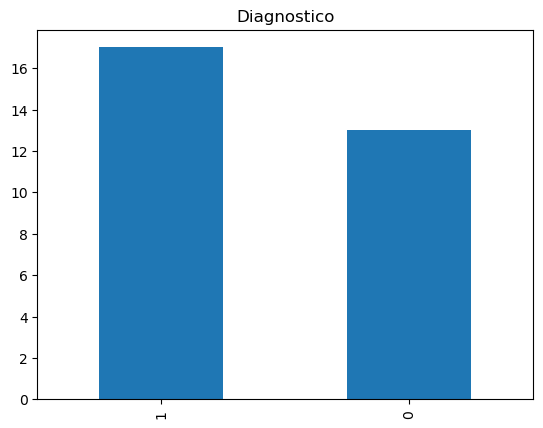

In [14]:
#Veamos que si nuestra base de datos esta mas o menos equlibrada, esto es importante pues si esta muy desequilibrida la clasificacion tendera a encontrar mas puntos de una etiqueta.
BD=datos.head(30)
Objetivo2=BD.Diagnostico.value_counts()
print(Objetivo2)
ax=Objetivo2.plot.bar()
plt.title("Diagnostico")
plt.show()

In [15]:
#Como esta equilibrado procedemos a ejecutar nuestro algoritmo KNN
Prediccion=[140,2,3.73,25.21,22.3,19]
Num_puntos=10
Estado=Algoritmo_KNN(Base_de_datos, Prediccion, Num_puntos)
print('Para los datos ingresados la clasificación es:', Estado)

Para los datos ingresados la clasificación es: Enfermo


Antes de usar nuestro algoritmo de prediccion usando regresion logistica , primero debemos verificar si hay relacion entre nuestras variables, por nuestra base de datos al ser la variable dependiente de caracter binaria podemos calcular esta relacion usando el coeficiente de correlación de punto biserial el cual es una medida de asociación entre una variable continua y una variable binaria.

## Coeficiente de correlación de punto biserial

El coeficiente de correlación de punto biserial es una medida de asociación entre una variable continua y una variable binaria (dicotómica). Se calcula utilizando la siguiente fórmula:

$rpbis =\frac{M_1 - M_0}{Sn}\sqrt{\frac{n_1 n_0}{n^2}}$

M1
  = Media del puntaje global del instrumento del grupo que contestó de manera positiva a la variable binaria (alta, uno).
  
M0
 = Media del puntaje global del instrumento del grupo que contestó de manera negativa a la variable binaria (baja, cero).

Sn
 = Desviación estándar del instrumento.

n
 = Tamaño de la población que contestó el instrumento.

n1
 = Tamaño del grupo que contestó de manera positiva a la variable binaria.

n0
 = Tamaño del grupo que contestó de manera negativa a la variable binaria.
 
 https://rpubs.com/jboscomendoza/correlacion_biserial_puntual_r
 
 https://aws.amazon.com/es/what-is/logistic-regression/

In [16]:
def Correlacion(x, y):
    '''
    Calcula el coeficiente de correlación biseral
    Args:
        x (lista): Variables independientes.
        y (lista): Variables objetivos (caracter binario).

    Returns:
        float: Coeficiente de correlación.
    '''
    n = len(x)#Contamos los elementos de x
    n0 = sum(y)#Sumamos todos los valores de y
    n1 = n - n0#Calculamos el  número de elementos diferentes de cero en y
    M0 = sum([x[i] for i in range(n) if y[i] == 0]) / n0# Calculamos la media de los elementos iguales a cero
    M1 = sum([x[i] for i in range(n) if y[i] == 1]) / n1# Calculamos la media de los elementos iguales a unp

    Mediax = sum(x) / n#Calculamos el promedio de x
    suma_cuadrados = sum((xi - Mediax) ** 2 for xi in x)
    Sn= (suma_cuadrados / n) ** 0.5#Calculamos desviacion estandar para poblacion
    R = ((M1 - M0) / Sn) * ((n1 * n0) / n**2)**0.5#Calculamos coeficiente

    return R #Imprimimos el coeficiente


Calculemos nuestros coeficientes de correlacion. 

In [17]:
x1= datos['Presion arterial'].tolist()
y1=datos['Diagnostico'].tolist()

In [18]:
Correlacion(x1, y1)

-0.004608898615786819

In [19]:
x2=datos['Tabaco en kg'].tolist()
y2=datos['Diagnostico'].tolist()

In [20]:
Correlacion(x2, y2)

0.26170262866398275

In [21]:
x3=datos['VLDL en mg/dl'].tolist()
y3=datos['Diagnostico'].tolist()

In [22]:
Correlacion(x3, y3)

0.10313722439122291

In [23]:
x4=datos['Adipositos'].tolist()
y4=datos['Diagnostico'].tolist()

In [24]:
Correlacion(x4, y4)

0.16068906657876383

In [25]:
x5=datos['Obesidad'].tolist()
y5=datos['Diagnostico'].tolist()

In [26]:
Correlacion(x5, y5)

-0.18577661279979546

In [27]:
x6=datos['Edad'].tolist()
y6=datos['Diagnostico'].tolist()

In [28]:
Correlacion(x6, y6)

0.2640738081521256

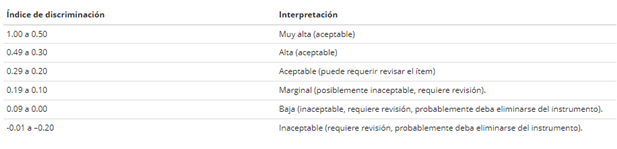

Notemos que las variables que indican un mejor coeficiente de relacion son el tabaco, los adipositos y la edad por lo consideraremos estas.

Para poder calcular los coeficientes se requiere de un algoritmo que es de caracter mas avanzado, pues requiere de mayores conocimientos en el machine learning, por ello usaremos la paqueteria numpy que nos permitira calcularlos y aplicarlos a nuestro algoritmo, consideraremos los primero 30 datos de nuestra base de datos.

In [29]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient

        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

#Contiene las variables independientes de nuestra base de datos 
X = np.array([[12,23.11,52], [0.01,28.61,63], [0.08,32.28,46], [7.5,38.03,58],[13.6,27.78,49]
              ,[6.2,36.21,45],[4.05,16.2,38],[4.08,14.6,58],[0,19.4,29],[0,30.96,53]
              ,[6,32.27,60],[14.1,22.39,40],[0,10.05,17],[0,17.21,15],[9.65,17.2,53]
             ,[1.53,28.95,46],[7.5,22.0,49],[10.5,35.36,53],[2.6,34.07,62],[14.0,35.96,59]
             ,[1.61,12.32,20],[7.9,26.5,44],[0.3,33.99,50],[0.6,28.66,58],[18.2,24.38,50]
             ,[4.0,31.29,42],[6.0,33.91,48],[9.1,27.55,61],[4.09,31.4,56],[0,25.69,63]])  
#Contiene las variables objetivo de nuestra base de datos
y = np.array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])  # Variable objetivo

# Inicializar los coeficientes y el sesgo
theta = np.zeros(X.shape[1])

# Hiperparámetros del descenso de gradiente
alpha = 0.01
num_iterations = 1000

# Aplicar el descenso de gradiente para obtener los coeficientes y el sesgo
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

# Imprimir los coeficientes y el sesgo resultantes
print("Coeficientes:", theta)
print("Sesgo:", theta[0])


Coeficientes: [ 0.12774706  0.04951558 -0.04316447]
Sesgo: 0.12774706497128158


Apliquemos ahora nuestro algoritmo ya con los coeficientes calculados.

In [30]:
coeficientes =[0.1,0.04,-0.04]
variables_independientes=[2.6,24.4,19]
etiqueta=regresion_logistica(coeficientes, variables_independientes, sesgo)
if etiqueta == "Etiqueta 1":
    print("La persona tiene o padecera una enfermedad cardiaca")
else:
    print("La persona no tiene o no padecera una enfermedad cardiaca")

La persona no tiene o no padecera una enfermedad cardiaca
